# Explore and Plot the ATL06 data

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (12, 7), 'font.size': 10})

import hvplot
import hvplot.pandas
import geoviews as gv

In [2]:
%matplotlib inline

In [3]:
# os.listdir(f'/fs/project/howat.4/icesat2/antarctica_ATL06')

In [10]:
short_name = 'ATL06'
# region = 'rema_27_qml_south'#'rema_02_peninsula_north'
# icesat2_path = f'/fs/project/howat.4/icesat2/antarctica_{short_name}/{region}'
# icesat2_path = f'/fs/project/howat.4/icesat2/antarctica_tiles_{short_name}'
icesat2_path = f'/fs/project/howat.4/icesat2/ArcticDEM/arcticdem_02_greenland_southeast_ATL06'
# icesat2_path = f'/fs/project/howat.4/icesat2/prototyping/antarctica_tiles_ATL06'
# icesat2_path = f'/fs/project/howat.4/icesat2/prototyping/test_ATL06'



In [11]:
strips = os.listdir(f'{icesat2_path}')
# outline = gpd.read_file(f'{icesat2_path}/outline.shp')
# # outline = outline.to_crs({'init': 'epsg:4326'})
# outline.plot(alpha=.3);

In [12]:
strip = strips[0]
strip

'W1W1_20181025_1020010078394500_102001007B169300_2m_lsf_v030403'

In [16]:
files = os.listdir(f'{icesat2_path}/{strip}')
files

['strip_outline.shp',
 'strip_outline.shx',
 'strip_outline.dbf',
 'strip_outline.cpg',
 'strip_outline.prj',
 'processed_ATL06_20181023165412_03830103_003_01.h5',
 'processed_ATL06_20181114043202_07110105_003_01.h5',
 'processed_ATL06_20181023165412_03830103_003_01.csv',
 'processed_ATL06_20181023165412_03830103_003_01.shp',
 'processed_ATL06_20181023165412_03830103_003_01.shx',
 'processed_ATL06_20181023165412_03830103_003_01.dbf',
 'processed_ATL06_20181023165412_03830103_003_01.cpg',
 'processed_ATL06_20181023165412_03830103_003_01.prj',
 'processed_ATL06_20181114043202_07110105_003_01.csv',
 'processed_ATL06_20181114043202_07110105_003_01.shp',
 'processed_ATL06_20181114043202_07110105_003_01.shx',
 'processed_ATL06_20181114043202_07110105_003_01.dbf',
 'processed_ATL06_20181114043202_07110105_003_01.cpg',
 'processed_ATL06_20181114043202_07110105_003_01.prj']

In [17]:
shp_ext = 'shp' #'.gpkg'
hdf_files = [f for f in files if f.endswith('.h5')]
shp_files = [f for f in files if f.endswith(f'.{shp_ext}') and 'ATL06' in f]
csv_files = [f for f in files if f.endswith('.csv') and 'ATL06' in f]
# To pick the largest granule for visualization only
sz_list = [os.path.getsize(f'{icesat2_path}/{strip}/{hdf}') for hdf in hdf_files]
idx = sz_list.index(max(sz_list)) #largest index
print(f'Count of shp files {len(shp_files)} and hdf = {len(hdf_files)}')

Count of shp files 2 and hdf = 2


In [18]:
# Analyze extracted Dates
ymd = [d.split('_')[2][:8] for d in shp_files]
ymd

['20181023', '20181114']

In [19]:
ymd = pd.to_datetime(ymd)
ymd

DatetimeIndex(['2018-10-23', '2018-11-14'], dtype='datetime64[ns]', freq=None)

In [20]:
ymd.min(), ymd.max()

(Timestamp('2018-10-23 00:00:00'), Timestamp('2018-11-14 00:00:00'))

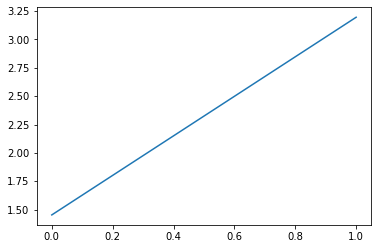

In [21]:
plt.plot([sz/1e6 for sz in sz_list]);

In [22]:
# idx = 4 #aside: choose here manually
fname = shp_files[idx].split(f'.{shp_ext}')[0]
fname

'processed_ATL06_20181114043202_07110105_003_01'

In [23]:
# Load ATL08 parsed data
df = pd.read_csv(f'{icesat2_path}/{strip}/{fname}.csv', parse_dates=True)
gdf = gpd.read_file(f'{icesat2_path}/{strip}/{fname}.{shp_ext}', parse_dates=True)
# Pick only the good quality data [verify if zero or one means good]
# df = df[df.q_flag==0]
# gdf = gdf[gdf.q_flag==0]

gtls = list(df.strip.unique())
print(len(df), gtls)
# gv.tile_sources.ESRI * gdf.hvplot.points(geo=True, color='strip', alpha=0.7, width=500, height=700, hover=['strip', 'h_te_media'])

3863 ['gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r']


In [24]:
len(df)

3863

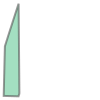

In [25]:
ch = gdf.geometry.unary_union.convex_hull
ch

In [26]:
# !echo $TMPDIR

In [27]:
y = gdf.geometry.unary_union.envelope
print(y)

POLYGON ((-32.20934346452155 68.08940777523294, -32.12491768017604 68.08940777523294, -32.12491768017604 68.58851974867218, -32.20934346452155 68.58851974867218, -32.20934346452155 68.08940777523294))


In [28]:
x = gpd.GeoDataFrame([ch])

In [29]:
# x.hvplot(geo=True, color='strip', alpha=0.7, width=400, height=500)
type(x)

geopandas.geodataframe.GeoDataFrame

In [30]:
# import contextily as ctx

In [31]:
base = gv.tile_sources.ESRI

In [32]:
# base * gdf.hvplot.points(geo=True, color='strip', alpha=0.7, width=800, height=500)

In [33]:
strips = gdf.hvplot.points(geo=True, color='strip', alpha=0.7, width=800, height=800)
terrain_scatter = df.hvplot(y='lat', x='h_li', kind='scatter', width=300, height=800, alpha=.7).relabel('terrain')

In [34]:
fig1 = base*strips + terrain_scatter

In [35]:
# hvplot.save(fig1, f'{icesat2_path}/{fname}.png')
# fig1
strips

:Points   [Longitude,Latitude]   (strip)

In [36]:
df.t_dt

0       2018-11-14 04:35:47.597
1       2018-11-14 04:35:47.600
2       2018-11-14 04:35:47.603
3       2018-11-14 04:35:47.606
4       2018-11-14 04:35:47.608
                 ...           
3858    2018-11-14 04:35:43.966
3859    2018-11-14 04:35:43.969
3860    2018-11-14 04:35:43.972
3861    2018-11-14 04:35:43.975
3862    2018-11-14 04:35:43.978
Name: t_dt, Length: 3863, dtype: object

In [37]:
df['t_dt'] = pd.to_datetime(df.t_dt)
df.t_dt

0      2018-11-14 04:35:47.597
1      2018-11-14 04:35:47.600
2      2018-11-14 04:35:47.603
3      2018-11-14 04:35:47.606
4      2018-11-14 04:35:47.608
                 ...          
3858   2018-11-14 04:35:43.966
3859   2018-11-14 04:35:43.969
3860   2018-11-14 04:35:43.972
3861   2018-11-14 04:35:43.975
3862   2018-11-14 04:35:43.978
Name: t_dt, Length: 3863, dtype: datetime64[ns]

In [38]:
df.head()

lon        lat       h_li  q_flag                    t_dt strip
0 -32.125173  68.102946  420.73364       0 2018-11-14 04:35:47.597  gt1l
1 -32.125232  68.102767  420.86172       0 2018-11-14 04:35:47.600  gt1l
2 -32.125291  68.102589  421.01465       0 2018-11-14 04:35:47.603  gt1l
3 -32.125349  68.102411  421.21268       0 2018-11-14 04:35:47.606  gt1l
4 -32.125407  68.102233  421.42218       0 2018-11-14 04:35:47.608  gt1l

In [39]:
# df.hvplot(y='h_li', x='t_dt', by='strip', kind='scatter')

In [40]:
len(hdf_files)

2

In [35]:
import panel as pn
import xarray as xr
import hvplot.xarray
import cartopy.crs as ccrs

rasm = xr.tutorial.open_dataset('rasm').load()
method = rasm.mean(dim='time').hvplot.quadmesh
opts = dict(x='xc', y='yc', cmap='rainbow', coastline=True, geo=True)

pn.interact(lambda **kwargs: method(**kwargs, **opts), rasterize=True, project=True, projection=[ccrs.GOOGLE_MERCATOR, ccrs.Orthographic(90, 30)])

Column
    [0] Column
        [0] Checkbox(name='rasterize', value=True)
        [1] Checkbox(name='project', value=True)
        [2] Select(name='projection', options=[<cartopy.crs.Mercator obj...], value=<cartopy.crs.Mercator o...)
    [1] Row
        [0] HoloViews(DynamicMap, name='interactive03183')